# 1. Import the necessary packages to use in this project

In [1]:
import plaidml.keras
import os
plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# 2. Lets load our data from the directory
Print to check if it is the correct directory
Windows uses \\ in their dir while MacOS or Linux uses //

In [3]:
print(os.listdir('C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\train'))

# Set path to access our directory
filenames = os.listdir('C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\train')

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg', 'cat.108.jpg', 'cat.109.jpg', 'cat.11.jpg', 'cat.110.jpg', 'cat.111.jpg', 'cat.112.jpg', 'cat.113.jpg', 'cat.114.jpg', 'cat.115.jpg', 'cat.116.jpg', 'cat.117.jpg', 'cat.118.jpg', 'cat.119.jpg', 'cat.12.jpg', 'cat.120.jpg', 'cat.121.jpg', 'cat.122.jpg', 'cat.123.jpg', 'cat.124.jpg', 'cat.125.jpg', 'cat.126.jpg', 'cat.127.jpg', 'cat.128.jpg', 'cat.129.jpg', 'cat.13.jpg', 'cat.130.jpg', 'cat.131.jpg', 'cat.132.jpg', 'cat.133.jpg', 'cat.134.jpg', 'cat.135.jpg', 'cat.136.jpg', 'cat.137.jpg', 'cat.138.jpg', 'cat.139.jpg', 'cat.14.jpg', 'cat.140.jpg', 'cat.141.jpg', 'cat.142.jpg', 'cat.143.jpg', 'cat.144.jpg', 'cat.145.jpg', 'cat.146.jpg', 'cat.147.jpg', 'cat.148.jpg', 'cat.149.jpg', 'cat.15.jpg', 'cat.150.jpg', 'cat.151.jpg', 'cat.152.jpg', 'cat.153.jpg', 'cat.154.jpg', 'cat.155.jpg', 'cat.156.jpg', 'cat.157.jpg', 'cat.158.jpg', 'cat

# 3. Create an empty array called 'categories'& Put data into DataFrame (2D array table)
Category names are cat and dog. 
*Arrays must be same length (3 letters)
Now we assign an integer according to the categories assigned

In [4]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat': 
        categories.append(0)  #The categories are set as labels
    elif category == 'dog':
        categories.append(1)
        
# Store filename and category in dataframe       
df = pd.DataFrame({
    'filename': filenames,  
    'category': categories,    
})

# View dataframe
df


,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0
...,...,...
1995,dog.995.jpg,1
1996,dog.996.jpg,1
1997,dog.997.jpg,1
1998,dog.998.jpg,1


1    1000
0    1000
Name: category, dtype: int64

 Total images:  2000


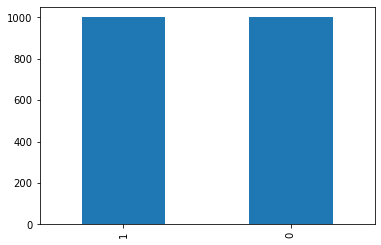

In [5]:
# Lets see total images and in each category

df['category'].value_counts().plot.bar()
print(df['category'].value_counts())

print("\n Total images: ", df.shape[0])

Lets see a sample of our image

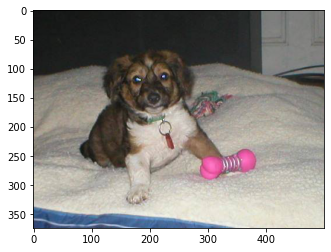

In [7]:
sample = random.choice(filenames)
image = load_img('C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\train\\'+sample)
plt.imshow(image)

# 4. For our image classifier, we will create a Convolutional Neural Network which is best suited for learning images.
You can try training without BatchNorm and Dropout layers, to see what happens.
BatchNorm and Dropout is used to reduce overfitting (Val loss higher than train loss in graph below)

The number beside Conv2D are the amount of features to extract
Flatten layer is used to combine all extracted features 
Final Dense layer is 2 because we have 2 classes (cat and dog) to classify. 

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
__________

# 5. Get callback for early stopping and ReduceLR to reduce learning rate when metric not improving

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001) 
callbacks = [earlystop, learning_rate_reduction]

# Use ImageGenerator to convert data to 1 hot encoding

In [20]:
df["category"] = df["category"].replace({ 0: 'cat', 1: 'dog'})

# 6. Lets split our files into 80% train and 20% validation. This is common practice in CNN.
Set state=0 to prevent random splitting

dog    800
cat    800
Name: category, dtype: int64

 Total train images:  1600


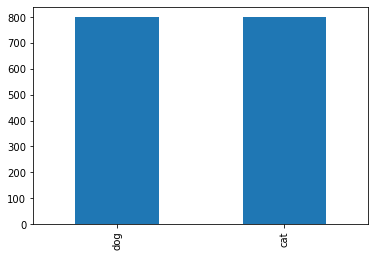

In [21]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()
print(train_df['category'].value_counts())
print("\n Total train images: ", train_df.shape[0])

dog    200
cat    200
Name: category, dtype: int64

 Total validate images:  400


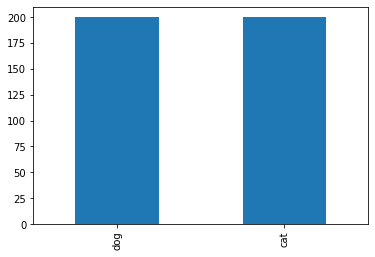

In [22]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['category'].value_counts().plot.bar()

print(validate_df['category'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [23]:
# Get total train and validate, and batch size to fit model

total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 1600
Total validate images: 400


# 7. Using Data augmentation will help us to artificially increase our dataset by 10 or more.
You can refer to the link here to understand more about the features of data augmentation - 
https://mc.ai/image-data-augmentation-image-processing-in-tensorflow-part-2/

In [24]:
train_datagen = ImageDataGenerator(
                                    rotation_range=15,
                                    rescale=1./255,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create train and valdiation generator
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=20
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=20
)

Found 1600 validated image filenames belonging to 2 classes.
Found 400 validated image filenames belonging to 2 classes.


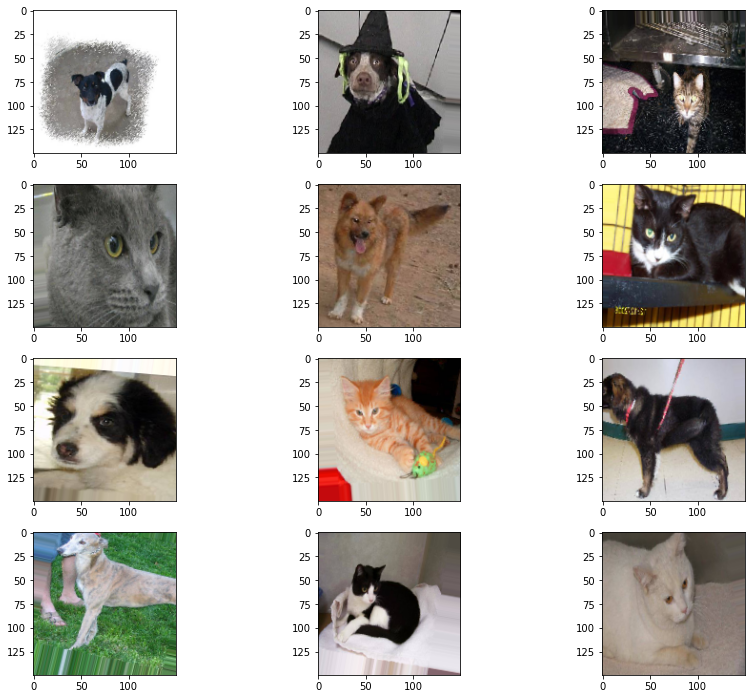

In [25]:
# Lets take a look at how augmented images from train generator look like

plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# 8. Train the model

In [26]:
epochs=20
batch_size=50

history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
    callbacks=callbacks
)

Epoch 1/20


INFO:plaidml:Analyzing Ops: 88 of 656 operations complete
INFO:plaidml:Analyzing Ops: 221 of 656 operations complete
INFO:plaidml:Analyzing Ops: 258 of 656 operations complete
INFO:plaidml:Analyzing Ops: 295 of 656 operations complete


32/32 [==============================] - 161s 5s/step - loss: 1.3688 - acc: 0.5500 - val_loss: 0.9272 - val_acc: 0.5563


C:\Users\kansh\anaconda3\envs\plaidMLEnv\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/20
32/32 [==============================] - 106s 3s/step - loss: 1.0530 - acc: 0.5422 - val_loss: 1.6738 - val_acc: 0.4625
Epoch 3/20
32/32 [==============================] - 89s 3s/step - loss: 1.0090 - acc: 0.5641 - val_loss: 1.0451 - val_acc: 0.4500
Epoch 4/20
32/32 [==============================] - 104s 3s/step - loss: 0.9136 - acc: 0.6063 - val_loss: 0.7698 - val_acc: 0.5000
Epoch 5/20
32/32 [==============================] - 108s 3s/step - loss: 0.9262 - acc: 0.5750 - val_loss: 0.8579 - val_acc: 0.5375
Epoch 6/20
32/32 [==============================] - 90s 3s/step - loss: 0.7379 - acc: 0.6547 - val_loss: 0.7834 - val_acc: 0.4625
Epoch 7/20
32/32 [==============================] - 99s 3s/step - loss: 0.7936 - acc: 0.6172 - val_loss: 1.2574 - val_acc: 0.5000
Epoch 8/20
32/32 [==============================] - 73s 2s/step - loss: 0.7899 - acc: 0.6047 - val_loss: 2.1630 - val_acc: 0.5063
Epoch 9/20
32/32 [==============================] - 95s 3s/step - loss: 0.6932 - acc: 0

# 9. Plot graph for train/val loss & train/val acc

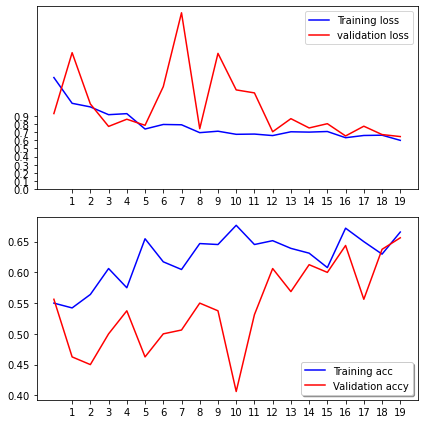

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

ax2.plot(history.history['acc'], color='b', label="Training acc")
ax2.plot(history.history['val_acc'], color='r',label="Validation accy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# 10. Save the trained model to re-use without having to re-train
# 11. Load saved model

You can set any filename you like, I set mine as 'catdog1' 

*Comment away the load command before saving, vice-versa for loading model.

*Comment away the model.fit code and graph plot code when loading model as you wont need them

In [42]:
model.save('catdog1.hdf5')  # creates a HDF5 file 'my_model.h5'

In [43]:
from keras import models    
model = models.load_model('catdog1.hdf5', compile = False)

# 12. Prepare test data
You can specify a different folder to predict on different kinds of image

In [44]:
test_filenames = os.listdir("C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\test")
test_df = pd.DataFrame({
    'filename': test_filenames
})

Check total images in test folder

In [45]:
total_test = test_df.shape[0]  
print("Total amount of test images are:", total_test)

Total amount of test images are: 100


# 13. Create test generator
Batch_size is 15 to run through batches for large dataset  

In [46]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 15

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\test\\", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False 
)

Found 100 validated image filenames.


# 14. Prediction of test data
np.ceil to round off array value to whole number
Use reset outputs in orderly manner

In [47]:
predict = model.predict_generator(test_generator, steps=np.ceil(total_test/batch_size))

# Get total predicteed images       

print("Number of predicted images:", len(predict), "\n")

# Get predictions in array
# These are labels 0, 1, 2 (category)
# Use [?:?] to specify range of index in list/array

print("    0:cat          1:dog   \n\n", predict, "\n")   

Number of predicted images: 100 

    0:cat          1:dog   

 [[0.8527167  0.14728332]
 [0.84205115 0.15794885]
 [0.96710724 0.03289279]
 [0.88456935 0.11543071]
 [0.6143559  0.38564408]
 [0.3509724  0.6490276 ]
 [0.42441535 0.5755846 ]
 [0.348753   0.65124696]
 [0.84542483 0.1545752 ]
 [0.59583783 0.40416217]
 [0.4651688  0.53483117]
 [0.57805234 0.42194763]
 [0.4939913  0.5060087 ]
 [0.9360163  0.06398373]
 [0.6511711  0.3488289 ]
 [0.5804742  0.4195258 ]
 [0.60139394 0.39860612]
 [0.5862192  0.41378084]
 [0.10493945 0.8950606 ]
 [0.42704558 0.57295436]
 [0.582878   0.41712198]
 [0.9222219  0.07777814]
 [0.3482117  0.6517883 ]
 [0.649209   0.35079095]
 [0.35034955 0.6496504 ]
 [0.34474486 0.65525514]
 [0.7118322  0.28816783]
 [0.4582175  0.5417825 ]
 [0.8452523  0.1547478 ]
 [0.8637598  0.13624017]
 [0.6106026  0.38939735]
 [0.74948394 0.25051603]
 [0.92245424 0.07754576]
 [0.36546624 0.6345338 ]
 [0.01597013 0.9840299 ]
 [0.8832249  0.11677509]
 [0.3900179  0.6099821 ]
 [0.0351347

# 15. Use np.argmax to get max value from array as predicted answer

In [48]:
test_df['category'] = np.argmax(predict, axis=-1) 

# Lets see the some predicted values for each category of images
# Use [?:?] to specify range 

print(test_df['category'][0:3]) 

0    0
1    0
2    0
Name: category, dtype: int64


# 16. Use train class indices for mapping

In [49]:
print(train_generator.class_indices) 
print(validation_generator.class_indices, "\n")

# Map labels 
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
print(label_map, "\n")

# See the output of mapped labels
print(test_df['category'][0:4], "\n")

# Lets replace letters with words to see better
print(test_df['category'][0:3])

{'cat': 0, 'dog': 1}
{'cat': 0, 'dog': 1} 

{0: 'cat', 1: 'dog'} 

0    cat
1    cat
2    cat
3    cat
Name: category, dtype: object 

0    cat
1    cat
2    cat
Name: category, dtype: object


# 17. View the amount of predicted image in category assigned 

cat    65
dog    35
Name: category, dtype: int64

Total predicted images: 100


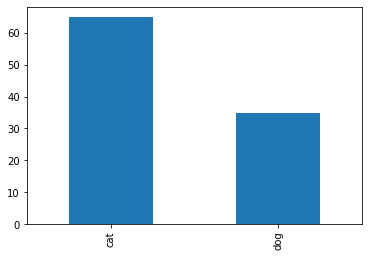

In [50]:
test_df['category'].value_counts()
print(test_df['category'].value_counts())

# View the above in a bar graph
test_df['category'].value_counts().plot.bar()

# Lets print the total predicted images 
print("\nTotal predicted images:", test_df.shape[0])

# 18. View predicted result with images
Calculate amt of subplot ( x * y = total value of plots displayed)

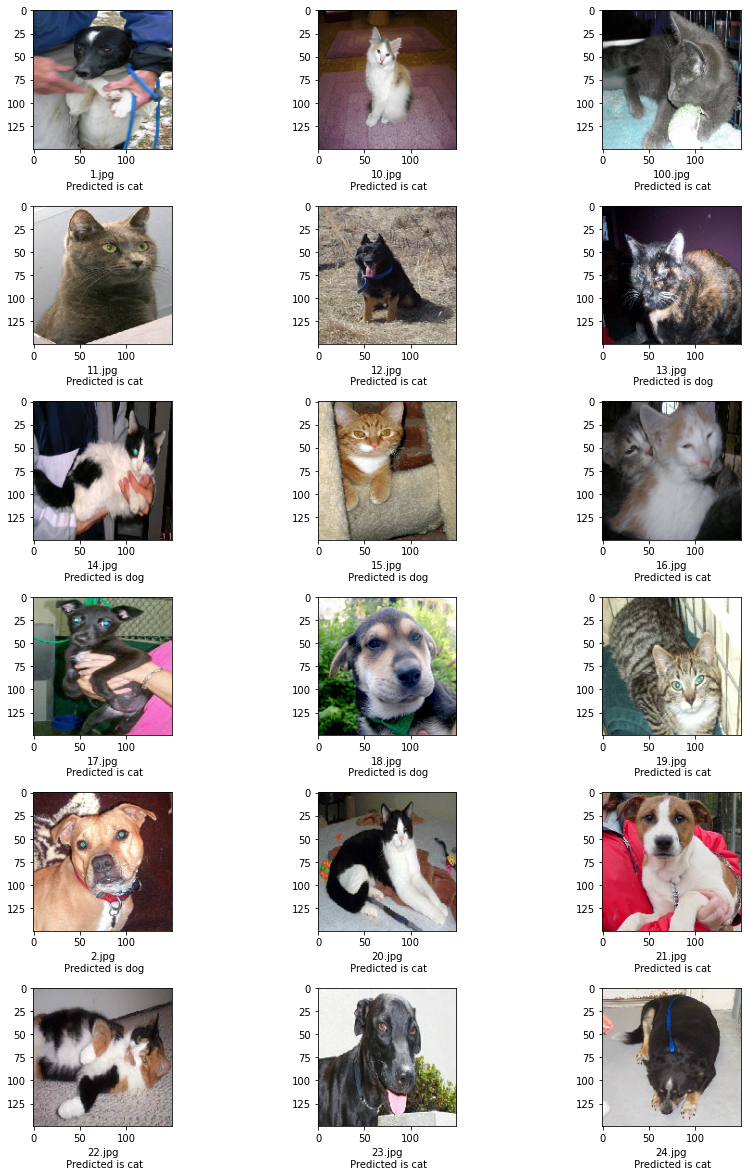

In [51]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:\\Users\\kansh\\Desktop\\FYP\\cats_dogs\\test\\"+filename, target_size=(150,150)) #rescale(1./255)
    plt.subplot(9, 3, index+1)      
    plt.imshow(img)
    plt.xlabel(filename + "\n Predicted is " + "{}".format(category))
plt.tight_layout()
plt.show()

# 19. Lastly, save predictions into CSV file

In [52]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('Catdog1.csv', index=False)

submission_df

,id,label
0,1,cat
1,10,cat
2,100,cat
3,11,cat
4,12,cat
...,...,...
95,95,dog
96,96,cat
97,97,dog
98,98,cat
